# Regression

## Scikit-Learn

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
# psuedo data
import numpy as np
import random

x_raw = []
y_raw = []
for n in range(1, 40):
    x_raw.append(n + random.random() * 2 - 1)
    y_raw.append((1 + random.random() / 3) * n + random.random() * 10 / n)
    
x_raw = np.array(x_raw)
y_raw = np.array(y_raw)

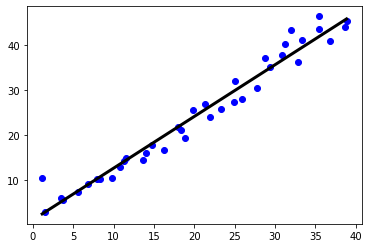

In [27]:
from matplotlib import pyplot as plt

model = LinearRegression(fit_intercept=True) # setting the formula to a0 + a1*x

# shape the data
x_data = x_raw.reshape(len(y_raw), 1)
y_data = y_raw.reshape(len(y_raw), 1)

model_fit = model.fit(x_data, y_data)

# regressor's predictions over the range of the data
prediction_space = np.linspace(min(x_data), max(x_data)).reshape(-1, 1)

# plot
plt.scatter(x_data, y_data, color="blue")
plt.plot(prediction_space, model.predict(prediction_space),
         color="black", linewidth=3)
plt.show()

## Regression Mechanics

For 1 feature: y = ax + b

- about choosing the best a and b to reduce loss
- use an error function that aligns with our objective
- since x is our independent variable and y is the dependent variable, we want to reduce the vertical distance between the line and the points
- this difference is called a **residual**
- since positive and negative residuals tend to cancel out, we use the sum of residual squares instead

For 2 features: $y = a_{1}x_{1} + a_{2}x_{2} + b$

- need to specify 3 variables: a1, a2, b

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
# psuedo data
import numpy as np
import random

x_raw = []
y_raw = []
for n in range(1, 1000):
    x_raw.append(n + random.random() * 2 - 1)
    y_raw.append((1 + random.random()) * n + random.random() * 10 / n)
    
x_raw = np.array(x_raw)
y_raw = np.array(y_raw)

x_data = x_raw.reshape(-1, 1)
y_data = y_raw.reshape(-1, 1)

- rate the model using R-squared
- variance in the target variable that is predicted from the feature variables
- important to have test sets to verify the data

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# rate the model
model.score(x_test, y_test)

0.8508015130781315

## Cross-validation

- R-squared during the testing is dependent on the way the data is split
- model might not generalise well to unseen data
- use cross-validations to check

### 1. Split the data into bins

- each new set is called a fold
- n-fold CV
- more folds is more computationally expensive and reduces the size of the test set

### 2. Hold one off while fitting the model to the rest

- on of the folds is reserved as a test set while the rest are used to fit the model
- predict on the test set

### 3. Compute the metric of interest

- use evaluation metrics to see how well the model fits for this set up of folds

### 4. Repeat by holding off on different folds

- with n values of R-squared, we have n values of R-squared
- use this range of R-squared data to compute statistics
- e.g. mean, median, 95% confidence intervals

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [33]:
# psuedo data
import numpy as np
import random

x_raw = []
y_raw = []
for n in range(1, 1000):
    x_raw.append(n + random.random() * 2 - 1)
    y_raw.append((1 + random.random() / 3) * n + random.random())
    
x_raw = np.array(x_raw)
y_raw = np.array(y_raw)

x_data = x_raw.reshape(-1, 1)
y_data = y_raw.reshape(-1, 1)

In [38]:
reg = LinearRegression()
cv_results = cross_val_score(reg, x_data, y_data, cv=5) # default score is R-squared
print(cv_results)
print(np.mean(cv_results))

[0.97488799 0.85117407 0.63151862 0.58010821 0.39637032]
0.6868118406404417


## Regularized Regression

- linear regression minimizes loss function
- chooses a coefficient for every feautre variable
- too many large coefficients can result in overfitting, small change in one variable swings predictions significantly
- penalise large coefficients (regularize)

### Ridge Regression

- Loss function = OLS loss function + $(a * \sum_{i=1}^{n}{a_i^2})$
- square value of the coefficient, large coefficients considered as higher loss
- choose alpha such that model performs best (hyperparameter tuning)
- alpha controls model complexity
    - too small: overfitting unaccounted for
    - too large: model is too simple (underfitting)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [64]:
# psuedo data
import numpy as np
import random

x_raw = []
y_raw = []
for n in range(1, 1000):
    x_raw.append(n + random.random() * 2 - 1)
    y_raw.append((1 + random.random())**2 * n + random.random())
    
x_raw = np.array(x_raw)
y_raw = np.array(y_raw)

x_data = x_raw.reshape(-1, 1)
y_data = y_raw.reshape(-1, 1)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True) # normalize makes sure that the variables are on the same scale
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)
ridge.score(x_test, y_test)

0.6225757934731561

### Lasso Regression

- Loss function = OLS loss function + $(a * \sum_{i=1}^{n}{|a_i|})$
- can be used to select the most important features of a dataset
- tends to shrink unimportant factors to 0

In [67]:
from sklearn.linear_model import Lasso

In [68]:
# standard lasso
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)
lasso = Lasso(alpha=0.1, normalize=True) # normalize makes sure that the variables are on the same scale
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)
lasso.score(x_test, y_test)

0.6336235868468345

<img src="Images/lasso_coef.png" width=500>